MISTrecognitionTESTで学習させたsudoku.pklをもちいての認識

In [3]:
from google.colab import files
upload = files.upload()

Saving 2.png to 2.png


2.png = 2


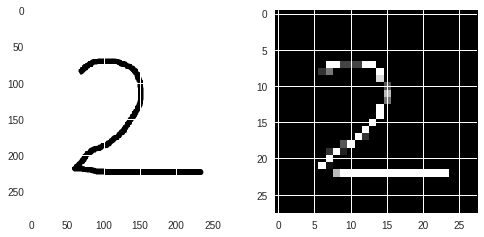

In [4]:
import cv2
from sklearn.externals import joblib
import matplotlib.pyplot as plt

def predict_digit(filename):
  #学習済みデータを読み込む
  clf = joblib.load("sudoku.pkl")
  #画像ファイルを読み込む
  my_img = cv2.imread(filename)
  #画像データを学習済みデータに合わせる
  my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
  
  plt.subplot(1, 2, 1)
  plt.imshow(my_img, cmap="gray")
  
  my_img = cv2.resize(my_img, (28, 28))
  my_img = 15 - my_img // 16
  
  plt.subplot(1, 2, 2)
  plt.imshow(my_img, cmap="gray")
  
  #一次元の配列に直して正規化
  my_img = my_img.reshape((-1, 784))#.astype('float32') / 255
  
  
  #データを予想する
  res = clf.predict(my_img)
  return res[0]

n = predict_digit("2.png")
print("2.png = " + str(n))

img17.png = 6


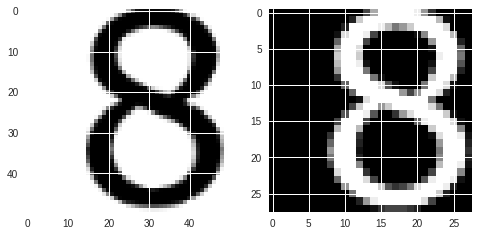

In [0]:
n = predict_digit("img17.png")
print("img17.png = " + str(n))

img25.png = 3


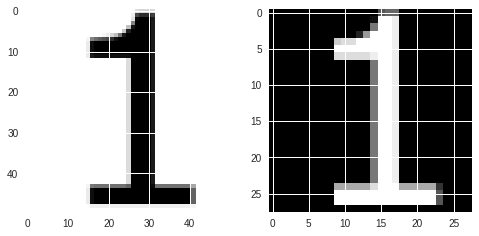

In [0]:
n = predict_digit("img25.png")
print("img25.png = " + str(n))

MISTの手書き文字のデータセットを使ってもできなかった！！！　　
やっぱり手書きの文字とフォントでは種類が違うらしい  
データセットをフォントの画像にして学習しなおすべきという結論